C:\Users\ujjawal singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


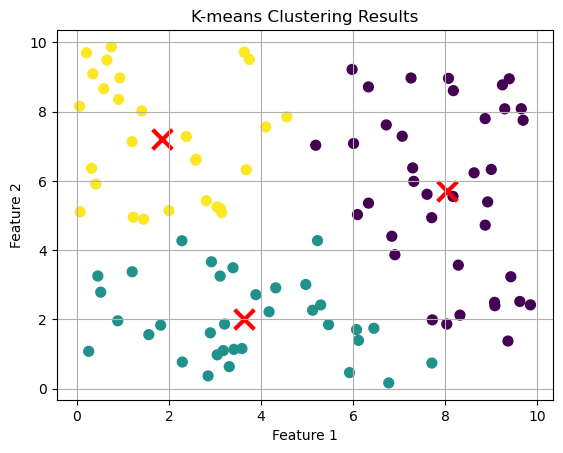

Inertia: 581.03


In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 2) * 10

# Create and fit K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.title('K-means Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Calculate inertia (sum of squared distances to nearest cluster center)
print(f"Inertia: {kmeans.inertia_:.2f}")


C:\Users\ujjawal singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


📊 Segmented Customer Data:

    CustomerID  AnnualSpending  PurchaseFrequency  AvgOrderValue  Segment
0            1           12000                120            100        1
1            2            8000                100             80        1
2            3            3000                 30            100        0
3            4            2500                 25            100        0
4            5            5000                 50            100        2
5            6            6000                 90             67        2
6            7            1000                 10            100        0
7            8            1500                 12            125        0
8            9            4500                 70             64        2
9           10            2000                 20            100        0
10          11            9000                 75            120        1
11          12             700                  5            140        0
12        

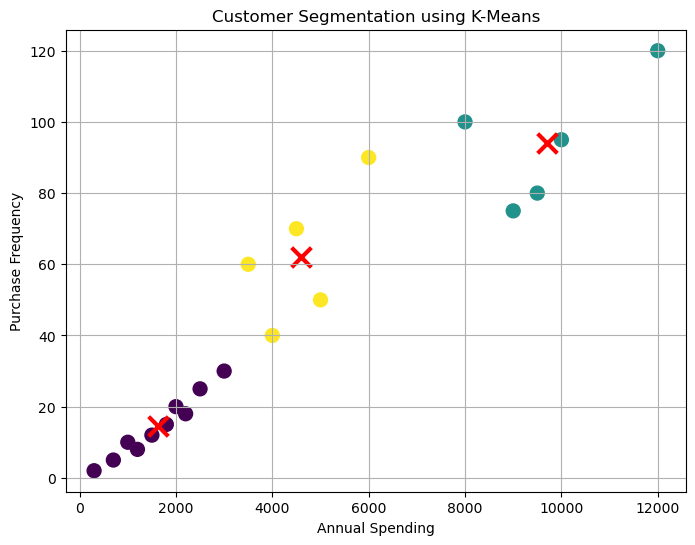


Inertia (Sum of Squared Distances): 18866010.60


In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Create the dataset directly
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                   11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'AnnualSpending': [12000, 8000, 3000, 2500, 5000, 6000, 1000, 1500, 4500, 2000,
                       9000, 700, 1200, 3500, 4000, 10000, 300, 9500, 1800, 2200],
    'PurchaseFrequency': [120, 100, 30, 25, 50, 90, 10, 12, 70, 20,
                          75, 5, 8, 60, 40, 95, 2, 80, 15, 18],
    'AvgOrderValue': [100, 80, 100, 100, 100, 67, 100, 125, 64, 100,
                      120, 140, 150, 58, 100, 105, 150, 118, 120, 122]
}

# Step 2: Convert to DataFrame
df = pd.DataFrame(data)

# Step 3: Select features for clustering
X = df[['AnnualSpending', 'PurchaseFrequency', 'AvgOrderValue']]

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Step 5: Add cluster labels
df['Segment'] = kmeans.labels_

# Step 6: Display results
print("📊 Segmented Customer Data:\n")
print(df)

# Step 7: Visualize clusters
plt.figure(figsize=(8,6))
plt.scatter(df['AnnualSpending'], df['PurchaseFrequency'], c=df['Segment'], cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='x', s=200, linewidths=3)
plt.xlabel("Annual Spending")
plt.ylabel("Purchase Frequency")
plt.title("Customer Segmentation using K-Means")
plt.grid(True)
plt.show()

# Step 8: Inertia
print(f"\nInertia (Sum of Squared Distances): {kmeans.inertia_:.2f}")


C:\Users\ujjawal singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


📊 Market Segments Identified:

    Region  Age  IncomeLevel PreferredProduct  SpendingScore  MarketSegment
0    North   35        55000      Electronics             70              1
1    South   42        62000        Groceries             85              2
2     East   29        48000         Clothing             60              1
3     West   50        70000        Furniture             90              0
4  Central   38        59000        Groceries             75              2
5    North   33        53000      Electronics             68              1
6    South   45        64000        Groceries             88              2
7     East   31        47000         Clothing             58              1
8     West   48        68000        Furniture             92              0
9  Central   36        60000        Groceries             77              2


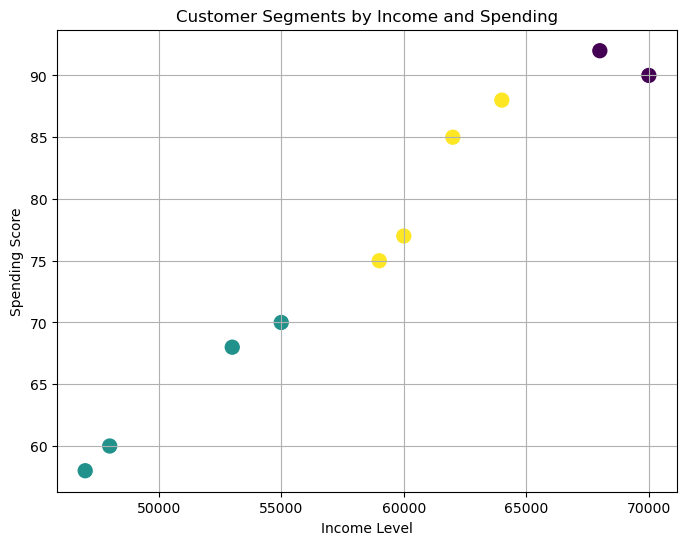


📉 Inertia (Sum of Squared Distances): 61500304.50


In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Create the dataset
data = {
    'Region': ['North', 'South', 'East', 'West', 'Central', 
               'North', 'South', 'East', 'West', 'Central'],
    'Age': [35, 42, 29, 50, 38, 33, 45, 31, 48, 36],
    'IncomeLevel': [55000, 62000, 48000, 70000, 59000, 
                    53000, 64000, 47000, 68000, 60000],
    'PreferredProduct': ['Electronics', 'Groceries', 'Clothing', 'Furniture', 'Groceries', 
                         'Electronics', 'Groceries', 'Clothing', 'Furniture', 'Groceries'],
    'SpendingScore': [70, 85, 60, 90, 75, 68, 88, 58, 92, 77]
}

df = pd.DataFrame(data)

# Step 2: Encode categorical columns
le_region = LabelEncoder()
le_product = LabelEncoder()

df['RegionCode'] = le_region.fit_transform(df['Region'])
df['ProductCode'] = le_product.fit_transform(df['PreferredProduct'])

# Step 3: Prepare feature set
X = df[['RegionCode', 'Age', 'IncomeLevel', 'ProductCode', 'SpendingScore']]

# Step 4: Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['MarketSegment'] = kmeans.fit_predict(X)

# Step 5: Print the clustered data
print("📊 Market Segments Identified:\n")
print(df[['Region', 'Age', 'IncomeLevel', 'PreferredProduct', 'SpendingScore', 'MarketSegment']])

# Step 6: Plot clusters (Income vs Spending Score)
plt.figure(figsize=(8,6))
plt.scatter(df['IncomeLevel'], df['SpendingScore'], c=df['MarketSegment'], cmap='viridis', s=100)
plt.xlabel('Income Level')
plt.ylabel('Spending Score')
plt.title('Customer Segments by Income and Spending')
plt.grid(True)
plt.show()

# Step 7: Optional - Print KMeans inertia (how tight clusters are)
print(f"\n📉 Inertia (Sum of Squared Distances): {kmeans.inertia_:.2f}")

C:\Users\ujjawal singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


📊 Market Segmentation Result:

    Region  Age  IncomeLevel PreferredProduct  SpendingScore  MarketSegment
0    North   35        55000      Electronics             70              1
1    South   42        62000        Groceries             85              2
2     East   29        48000         Clothing             60              1
3     West   50        70000        Furniture             90              0
4  Central   38        59000        Groceries             75              2
5    North   33        53000      Electronics             68              1
6    South   45        64000        Groceries             88              2
7     East   31        47000         Clothing             58              1
8     West   48        68000        Furniture             92              0
9  Central   36        60000        Groceries             77              2


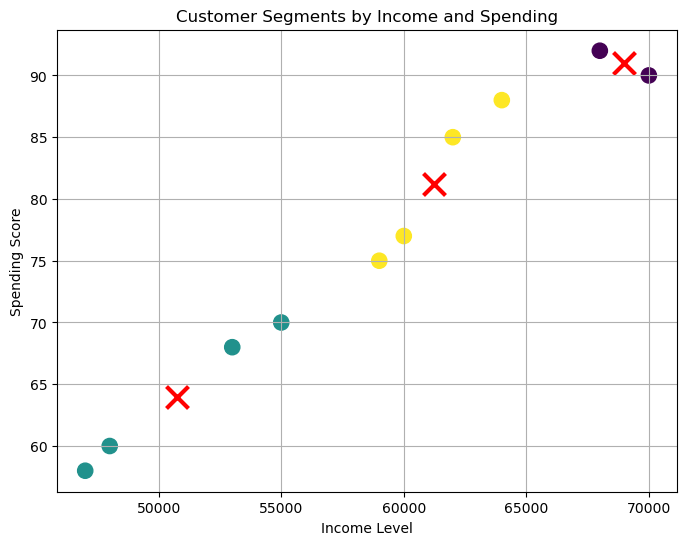


📉 Inertia (Sum of Squared Distances within clusters): 61500304.50


In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Create the dataset
data = {
    'Region': ['North', 'South', 'East', 'West', 'Central',
               'North', 'South', 'East', 'West', 'Central'],
    'Age': [35, 42, 29, 50, 38, 33, 45, 31, 48, 36],
    'IncomeLevel': [55000, 62000, 48000, 70000, 59000,
                    53000, 64000, 47000, 68000, 60000],
    'PreferredProduct': ['Electronics', 'Groceries', 'Clothing', 'Furniture', 'Groceries',
                         'Electronics', 'Groceries', 'Clothing', 'Furniture', 'Groceries'],
    'SpendingScore': [70, 85, 60, 90, 75, 68, 88, 58, 92, 77]
}

df = pd.DataFrame(data)

# Step 2: Encode categorical features
le_region = LabelEncoder()
le_product = LabelEncoder()

df['RegionCode'] = le_region.fit_transform(df['Region'])
df['ProductCode'] = le_product.fit_transform(df['PreferredProduct'])

# Step 3: Prepare feature set for clustering
X = df[['RegionCode', 'Age', 'IncomeLevel', 'ProductCode', 'SpendingScore']]

# Step 4: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['MarketSegment'] = kmeans.fit_predict(X)

# Step 5: Print the segmented data
print("📊 Market Segmentation Result:\n")
print(df[['Region', 'Age', 'IncomeLevel', 'PreferredProduct', 'SpendingScore', 'MarketSegment']])

# Step 6: Plot clusters (Income vs Spending Score)
plt.figure(figsize=(8, 6))
plt.scatter(df['IncomeLevel'], df['SpendingScore'], c=df['MarketSegment'], cmap='viridis', s=120)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 4], c='red', marker='x', s=250, linewidths=3)
plt.xlabel('Income Level')
plt.ylabel('Spending Score')
plt.title('Customer Segments by Income and Spending')
plt.grid(True)
plt.show()

# Step 7: Inertia
print(f"\n📉 Inertia (Sum of Squared Distances within clusters): {kmeans.inertia_:.2f}")